This study guide should reinforce and provide practice for all of the concepts you have seen in the past week. There are a mix of written questions and coding exercises, both are equally important to prepare you for the sprint challenge as well as to be able to speak on these topics comfortably in interviews and on the job.

If you get stuck or are unsure of something remember the 20 minute rule. If that doesn't help, then research a solution with google and stackoverflow. Only once you have exausted these methods should you turn to your Team Lead - they won't be there on your SC or during an interview. That being said, don't hesitate to ask for help if you truly are stuck.

Have fun studying!

# Resources

[Category Encoders](https://contrib.scikit-learn.org/categorical-encoding/)

[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Hyperparameter Tuning](https://scikit-learn.org/stable/modules/grid_search.html)

[Confusion Matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

[Scoring Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [1]:
import pandas as pd

Use the dataframe below for all questions unless otherwise stated

In [3]:
# https://www.kaggle.com/ronitf/heart-disease-uci
df = pd.read_csv('https://raw.githubusercontent.com/bundickm/Study-Guides/master/data/hearts.csv', index_col=0)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,D,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Male,C,130,250,0,1,187,0,3.5,0,0,2,1
2,41,Female,B,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Male,B,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Female,A,120,354,0,1,163,1,0.6,2,0,2,1


# Basics and Data Preparation

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Logistic Regression:** `A statistical model using a logistic function to classify a binary dependent variable`

**Imbalanced Classes:** ` A disproportionate ratio of observations in each class in a dataset`

**Leakage:** `Unrealistic improvements in model performance by poor data management between training and test subsets`

**Categorical Encoding:** `Transforming categorical data into numerical format through techniques such as One Hot and Ordinal Encoding`

**Skew:** `A measure of asymmetry from the shape of a normal distribution with respect to data of interest`

**Log Transformation:** `A mathematical transformation applied to skewed dataset to conform to a normal distribution`

**Outliers:** `Observations in a dataset which significantly deviate from most other observations`

Answer the following questions in plain english as much as possible.
<br/><br/>

What are some ways to deal with imbalanced classes?
```
Your Answer Here
```

What are some possible sources of data leakage?
```
Your Answer Here
```

What are some indicators or methods for detecting data leakage?
```
Your Answer Here
```

What is the relationship between skew and log transformation?
```
Your Answer Here
```

Using the dataset above, complete the following:
- Train/Test/Validation Split
- Get a baseline
- Perform EDA with visuals
- Clean up any nulls, duplicate columns, or outliers you might find
- Engineer at least 2 features
- Use One Hot or Ordinal Encoding on one feature

### Train/Test/Validation Split

In [4]:
from sklearn.model_selection import train_test_split

In [94]:
train, test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=8)

train, validate = train_test_split(train, train_size=0.8, test_size=0.2, random_state=8)

train.shape, validate.shape, test.shape

((193, 14), (49, 14), (61, 14))

### Get a baseline

In [13]:
train.target.value_counts(normalize=True)*100

1    51.813472
0    48.186528
Name: target, dtype: float64

### Perform EDA with visuals

In [14]:
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
111,57,Male,C,150,126,1,1,173,0,0.2,2,1,3,1
301,57,Male,A,130,131,0,1,115,1,1.2,1,1,3,0
251,43,Male,A,132,247,1,0,143,1,0.1,1,4,3,0
188,50,Male,C,140,233,0,1,163,0,0.6,1,1,3,0
150,66,Male,A,160,228,0,0,138,0,2.3,2,0,1,1


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

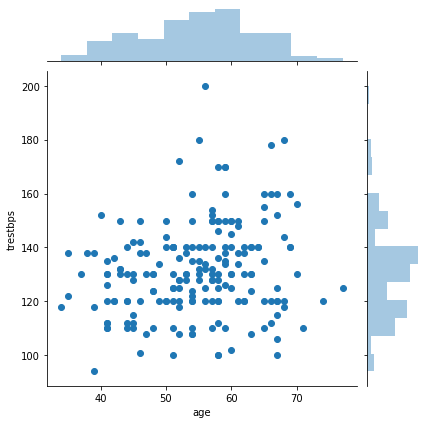

In [20]:
sns.jointplot(x="age",y="trestbps", data=train)
plt.show()

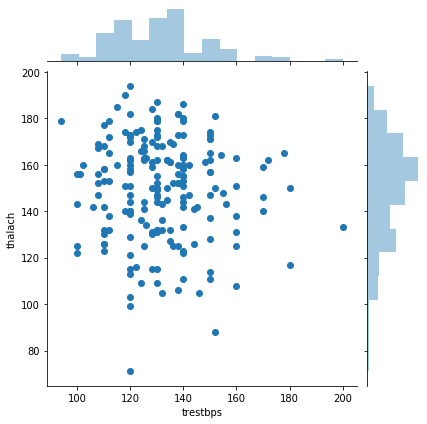

In [22]:
sns.jointplot(x="trestbps",y="thalach", data=train)
plt.show()

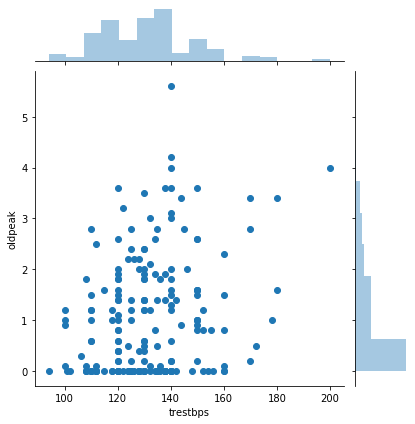

In [23]:
sns.jointplot(x="trestbps",y="oldpeak", data=train)
plt.show()

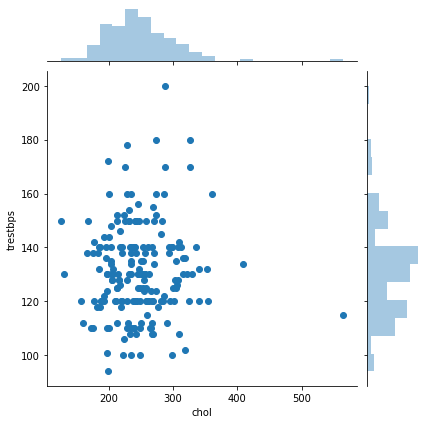

In [25]:
sns.jointplot(x="chol",y="trestbps", data=train)
plt.show()

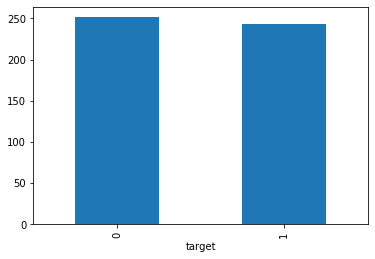

In [29]:
train.groupby("target")["chol"].mean().plot.bar()

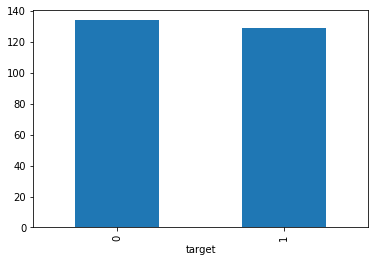

In [30]:
train.groupby("target")["trestbps"].mean().plot.bar()

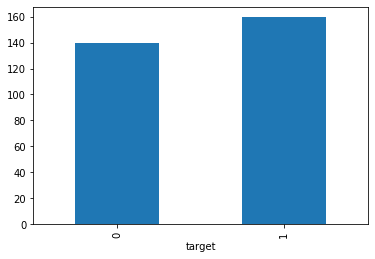

In [33]:
train.groupby("target")["thalach"].mean().plot.bar()

### Clean up any nulls, duplicate columns, or outliers you might find

In [35]:
train.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

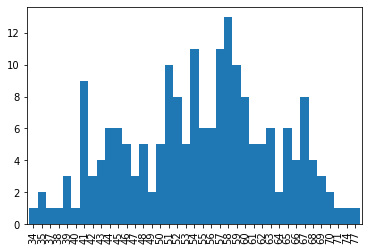

In [45]:
train["age"].value_counts(dropna=False).sort_index().plot.bar(width=1)

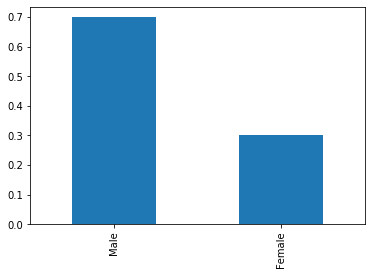

In [48]:
train["sex"].value_counts(dropna=False, normalize=True).plot(kind="bar")

In [50]:
train.describe(include="all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,193.000000,193,193,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
unique,NaN,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,135,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,54.663212,NaN,NaN,131.481865,247.056995,0.160622,0.507772,149.860104,0.310881,1.073575,1.430052,0.746114,2.352332,0.518135
std,8.794266,NaN,NaN,17.180747,51.501839,0.368137,0.521608,21.952746,0.464058,1.143585,0.592073,1.016939,0.595300,0.500971
min,34.000000,NaN,NaN,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,NaN,NaN,120.000000,212.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,NaN,NaN,130.000000,243.000000,0.000000,0.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,NaN,NaN,140.000000,271.000000,0.000000,1.000000,165.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000


### Engineer at least 2 features

In [96]:
train["cholesterol years"] = (train["chol"] / train["chol"].mean()) + (train["age"] / train["age"].mean())

train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cholesterol years
111,57,Male,C,150,126,1,1,173,0,0.2,2,1,3,1,1.552753
301,57,Male,A,130,131,0,1,115,1,1.2,1,1,3,0,1.572991
251,43,Male,A,132,247,1,0,143,1,0.1,1,4,3,0,1.786404
188,50,Male,C,140,233,0,1,163,0,0.6,1,1,3,0,1.857794
150,66,Male,A,160,228,0,0,138,0,2.3,2,0,1,1,2.130257


In [97]:
train.groupby("target")["cholesterol years"].mean()

target
0    2.059687
1    1.944491
Name: cholesterol years, dtype: float64

In [98]:
train["max heart rate years"] = (train["thalach"] / train["thalach"].mean()) + (train["age"] / train["age"].mean())
train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cholesterol years,max heart rate years
111,57,Male,C,150,126,1,1,173,0,0.2,2,1,3,1,1.552753,2.197159
301,57,Male,A,130,131,0,1,115,1,1.2,1,1,3,0,1.572991,1.810131
251,43,Male,A,132,247,1,0,143,1,0.1,1,4,3,0,1.786404,1.740858
188,50,Male,C,140,233,0,1,163,0,0.6,1,1,3,0,1.857794,2.002373
150,66,Male,A,160,228,0,0,138,0,2.3,2,0,1,1,2.130257,2.128252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,65,Male,A,120,177,0,1,140,0,0.4,2,0,3,1,1.905533,2.123304
299,45,Male,D,110,264,0,1,132,0,1.2,1,0,3,0,1.891802,1.704044
70,54,Male,C,120,258,0,0,147,0,0.4,1,0,3,1,2.032161,1.968782
257,50,Male,A,144,200,0,0,126,1,0.9,1,0,3,0,1.724222,1.755476


In [99]:
train.groupby("target")["max heart rate years"].mean()

target
0    1.974245
1    2.023952
Name: max heart rate years, dtype: float64

In [142]:
train["number of major vessel years"] = train["ca"] * (train["age"] / train["age"].mean())

In [143]:
train.groupby("target")["number of major vessel years"].mean()

target
0    1.304764
1    0.329655
Name: number of major vessel years, dtype: float64

In [144]:
validate["cholesterol years"] = ((validate["chol"].copy() / validate["chol"].mean()) + (validate["age"].copy() / validate["age"].mean()))
validate["max heart rate years"] = ((validate["thalach"].copy() / validate["thalach"].mean()) + (validate["age"] .copy()/ validate["age"].mean()))
validate["number of major vessel years"] = validate["ca"] * (validate["age"] / validate["age"].mean())

test["cholesterol years"] = ((test["chol"].copy() / test["chol"].mean()) + (test["age"].copy() / test["age"].mean()))
test["max heart rate years"] = ((test["thalach"].copy() / test["thalach"].mean()) + (test["age"].copy() / test["age"].mean())).copy()
test["number of major vessel years"] = test["ca"] * (test["age"] / test["age"].mean())

/home/alex/anaconda3/envs/geoprocessing/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/alex/anaconda3/envs/geoprocessing/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/alex/anaconda3/envs/geoprocessing/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [103]:
train.dtypes

age                       int64
sex                      object
cp                       object
trestbps                  int64
chol                      int64
fbs                       int64
restecg                   int64
thalach                   int64
exang                     int64
oldpeak                 float64
slope                     int64
ca                        int64
thal                      int64
target                    int64
cholesterol years       float64
max heart rate years    float64
dtype: object

### Use One Hot or Ordinal Encoding on one feature

In [145]:
# The status_group column is the target
target = 'target'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality<=50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features

In [153]:
X_train = train[features]
y_train = train[target]
X_validate = validate[features]
y_validate = validate[target]
X_test = test[features]
y_test = test[target]

In [106]:
# I will include Ordinal Encoding in my prediction pipeline

# Model Building

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Decision Tree:** `Your Answer Here`

**Ensemble Methods (Ensemble Models):** `Your Answer Here`

**Gradient Descent:** `Your Answer Here`

**Bagging:** `Your Answer Here`

**Boosting:** `Your Answer Here`

**Hyperparameters:** `Your Answer Here`

Build a random forest classifier using the dataset you cleaned and prepped above.

In [110]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [147]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    RandomForestClassifier(n_jobs=-1, min_samples_leaf=2, random_state=8)
)

pipeline.fit(X_train, y_train)

print ('Train Accuracy', pipeline.score(X_train, y_train))
print ('Validation Accuracy', pipeline.score(X_validate, y_validate))

Train Accuracy 0.9844559585492227
Validation Accuracy 0.7755102040816326


Graph your model's feature importances

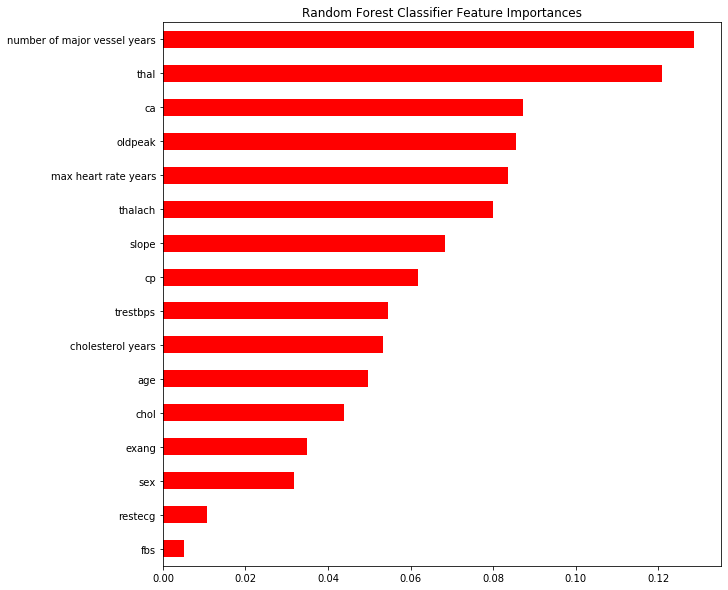

In [148]:
model = pipeline.named_steps["randomforestclassifier"]

encoder = pipeline.named_steps["ordinalencoder"]

encoded_columns = encoder.transform(X_validate).columns

importances = pd.Series(model.feature_importances_, encoded_columns)

plt.figure(figsize=(10,10))
importances.sort_values().plot(kind="barh", color="red")
plt.title("Random Forest Classifier Feature Importances")
plt.show()


In 2-3 sentences, explain how to interpret and use the feature importances to further refine or help explain your model.

```
Your Answer Here
```

How does feature importance differ from drop-column importances and permutation importances?

```
Your Answer Here
```

Build a logisitic regression model using the dataset you cleaned and prepped above.

In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=8)
)

pipeline.fit(X_train, y_train)

print ('Train Accuracy', pipeline.score(X_train, y_train))
print ('Validation Accuracy', pipeline.score(X_validate, y_validate))

Train Accuracy 0.8808290155440415
Validation Accuracy 0.7551020408163265


Plot the coefficients of your model.

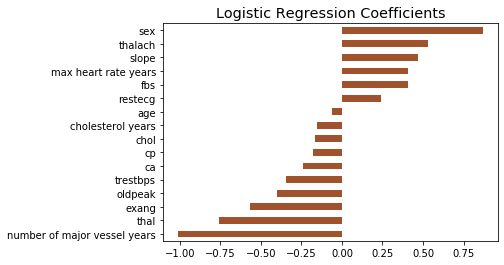

In [152]:
model = pipeline.named_steps["logisticregression"]

coefficients = pd.Series(model.coef_[0], X_train.columns)
coefficients.sort_values().plot.barh(color="#A0522D");
plt.title("Logistic Regression Coefficients", size="x-large")
plt.show()


In 2-3 sentences, explain how to interpret and use the coefficients to further refine or help explain your model.

```
Your Answer Here
```

What is an example of an ensemble method?

```
Your Answer Here
```

What do we mean by hyperparameter tuning and how can we automate the tuning process?

```
Your Answer Here
```

# Metrics and Model Evaluation

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**ROC:** `Your Answer Here`

**ROC-AUC:** `Your Answer Here`

**Discrimination Threshold:** `Your Answer Here`

**Precision:** `Your Answer Here`

**Recall:** `Your Answer Here`

**F1 Score:** `Your Answer Here`

**Confusion Matrix:** `Your Answer Here`

Choose one of your models above to complete the following:
- Get your model's validation accuracy (This may be done multiple times if you are refining your model)
- Get your model's test accuracy
- Create a confusion matrix for your model
- Calculate the Accuracy, F1 Score, Precision, and Recall by hand
- Use SKLearn to calculate accuracy, F1 score, precision, and recall to confirm your work.

### Get your model's validation accuracy (This may be done multiple times if you are refining your model)

In [154]:
print ('Validation Accuracy', pipeline.score(X_validate, y_validate))


Validation Accuracy 0.7551020408163265


### Get your model's test accuracy

In [155]:
print ('Testing Accuracy', pipeline.score(X_test, y_test))


Testing Accuracy 0.7868852459016393


### Create a confusion matrix for your model

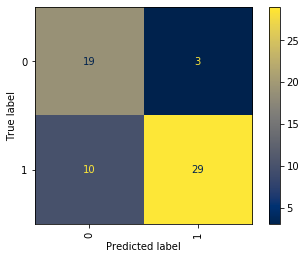

In [165]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipeline, X_test, y_test, values_format='.0f', xticks_rotation="vertical", cmap="cividis")

plt.show()

### Calculate the Accuracy, F1 Score, Precision, and Recall by hand

In [159]:
correct_predictions = 19 + 29
correct_predictions

48

In [160]:
total_predictions = 19 + 3 + 10 + 29
total_predictions

61

In [161]:
classification_accuracy = correct_predictions / total_predictions
classification_accuracy

0.7868852459016393

In [166]:
correct_predictions_0 = 19
correct_predictions_1 = 29

total_predictions_0 = 19 + 10
total_preditions_1 = 3 + 29

In [167]:
precision_0 = correct_predictions_0 / total_predictions_0
precision_0

0.6551724137931034

### Use SKLearn to calculate accuracy, F1 score, precision, and recall to confirm your work.

In [164]:
from sklearn.metrics import classification_report
y_pred = pipeline.predict(X_validate)
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        23
           1       0.77      0.77      0.77        26

    accuracy                           0.76        49
   macro avg       0.75      0.75      0.75        49
weighted avg       0.76      0.76      0.76        49



Give an example of when we would use precision to score our model and explain why precision is the best metric for that situation.

```
Your Answer Here
```

Give an example of when we would use recall to score our model and explain why recall is the best metric for that situation.

```
Your Answer Here
```

Find your model's ROC-AUC Score

In [168]:
y_pred_proba = pipeline.predict_proba(X_validate)[:,1]

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_validate, y_pred_proba)

In [170]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_validate, y_pred_proba)

0.8444816053511707

Plot your model's ROC Curve

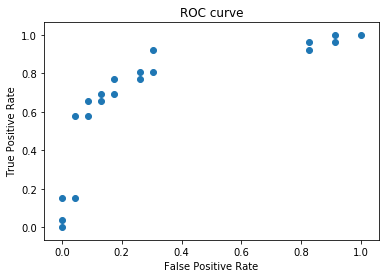

In [171]:
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');